In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Check if folder input exists

# Define the folder name
folder_name = '../input'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../input' folder already exists.


In [3]:
# Check if folder tickers exists

# Define the folder name
folder_name = '../tickers'

# Check if the folder exists
if not os.path.exists(folder_name):
    # If it doesn't exist, create the folder
    os.makedirs(folder_name)
    print(f"'{folder_name}' folder created.")
else:
    print(f"'{folder_name}' folder already exists.")

'../tickers' folder already exists.


In [4]:
# Webscrapping Wikipedia table to get the EU50 components
page = requests.get("https://en.wikipedia.org/wiki/EURO_STOXX_50")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find_all(class_="wikitable sortable")[1]

In [5]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Ticker,Main listing,Name,Corporate form,Registered office,Industry,Founded
0,ADS.DE,FWB: ADS,Adidas,Aktiengesellschaft,Germany,Sportwear,1924
1,ADYEN.AS,Euronext: ADYEN,Adyen,Naamloze vennootschap,Netherlands,Software—Infrastructure,2006
2,AD.AS,Euronext: AD,Ahold Delhaize,Naamloze vennootschap,Netherlands,Retail,2016 (1867)
3,AI.PA,Euronext Paris: AI,Air Liquide,Société Anonyme,France,Chemistry,1902
4,AIR.PA,Euronext: AIR,Airbus,Societas Europaea,France,Aerospace,1970
5,ALV.DE,FWB: ALV,Allianz,Societas Europaea,Germany,Insurance,1890
6,ABI.BR,Euronext: ABI,Anheuser-Busch InBev,Société Anonyme/ Naamloze vennootschap,Belgium,Food and beverage,2008 (1366/1888/1852/1895)
7,ASML.AS,Euronext: ASML,ASML Holding,Naamloze vennootschap,Netherlands,Technology,1984
8,CS.PA,Euronext: CS,AXA,Société Anonyme,France,Insurance,1816
9,BAS.DE,FWB: BAS,BASF,Societas Europaea,Germany,Chemistry,1865


In [6]:
wiki.rename(columns={'Industry':'Sector'}, inplace=True)

In [7]:
# Add index row values
new_row = {'Name': 'Euro Stoxx 50', 'Sector': 'Index', 'Ticker': '^STOXX50E'}

# Convert the new row to a DataFrame
new_row_df = pd.DataFrame([new_row])

# Append the new row to the DataFrame
wiki = pd.concat([wiki[['Name','Sector','Ticker']], new_row_df], ignore_index=True)
wiki.head(41)

,Name,Sector,Ticker
0,Adidas,Sportwear,ADS.DE
1,Adyen,Software—Infrastructure,ADYEN.AS
2,Ahold Delhaize,Retail,AD.AS
3,Air Liquide,Chemistry,AI.PA
4,Airbus,Aerospace,AIR.PA
5,Allianz,Insurance,ALV.DE
6,Anheuser-Busch InBev,Food and beverage,ABI.BR
7,ASML Holding,Technology,ASML.AS
8,AXA,Insurance,CS.PA
9,BASF,Chemistry,BAS.DE


In [8]:
# Get the data for the stock stoxx50
index_list = wiki['Ticker'].tolist()

In [9]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False,multi_level_index=False,actions=True,auto_adjust=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/51 [00:00<?, ?it/s]

In [10]:
# Get the name of the notebook
notebook_name = os.path.basename(globals()['__vsc_ipynb_file__'])
notebook_name = notebook_name.split('-')[0]

In [11]:
# Save all the tickers data
wiki[['Name','Sector','Ticker']].to_csv(f"../tickers/{notebook_name}.csv",index=True)

In [12]:
# Configuration of different parameters of the notebook
ticker = '^STOXX50E'
year = '2025'

In [13]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2007-03-30,4181.029785,4181.029785,0.0,4207.759766,4160.350098,4177.669922,0.0,0
2007-04-02,4189.549805,4189.549805,0.0,4191.759766,4163.770020,4177.310059,0.0,0
2007-04-03,4246.299805,4246.299805,0.0,4248.069824,4199.540039,4199.540039,0.0,0
2007-04-04,4261.830078,4261.830078,0.0,4261.830078,4242.049805,4252.709961,0.0,0
2007-04-05,4271.540039,4271.540039,0.0,4274.169922,4253.790039,4259.979980,0.0,0
2007-04-10,4301.470215,4301.470215,0.0,4307.660156,4267.009766,4275.680176,0.0,0
2007-04-11,4293.200195,4293.200195,0.0,4326.700195,4284.919922,4298.240234,0.0,0
2007-04-12,4280.020020,4280.020020,0.0,4291.100098,4249.299805,4290.109863,0.0,0
2007-04-13,4317.350098,4317.350098,0.0,4319.279785,4284.029785,4285.560059,0.0,0


In [14]:
# Check DataFrame tail
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,,
2025-04-04,4878.310059,4878.310059,0.0,5094.790039,4825.700195,5094.790039,0.0,71980100
2025-04-07,4656.410156,4656.410156,0.0,4902.990234,4540.220215,4861.160156,0.0,76388500
2025-04-08,4773.649902,4773.649902,0.0,4826.680176,4669.950195,4700.370117,0.0,43434700
2025-04-09,4622.140137,4622.140137,0.0,4708.140137,4569.509766,4705.910156,0.0,44888000
2025-04-10,4818.919922,4818.919922,0.0,4987.620117,4631.370117,4631.370117,0.0,45707700
2025-04-11,4787.229980,4787.229980,0.0,4870.970215,4728.529785,4841.640137,0.0,29758300
2025-04-14,4911.390137,4911.390137,0.0,4936.120117,4828.560059,4828.560059,0.0,27662300
2025-04-15,4970.430176,4970.430176,0.0,4977.490234,4913.729980,4915.470215,0.0,32396600
2025-04-16,4966.500000,4966.500000,0.0,4967.089844,4891.109863,4956.149902,0.0,25368200


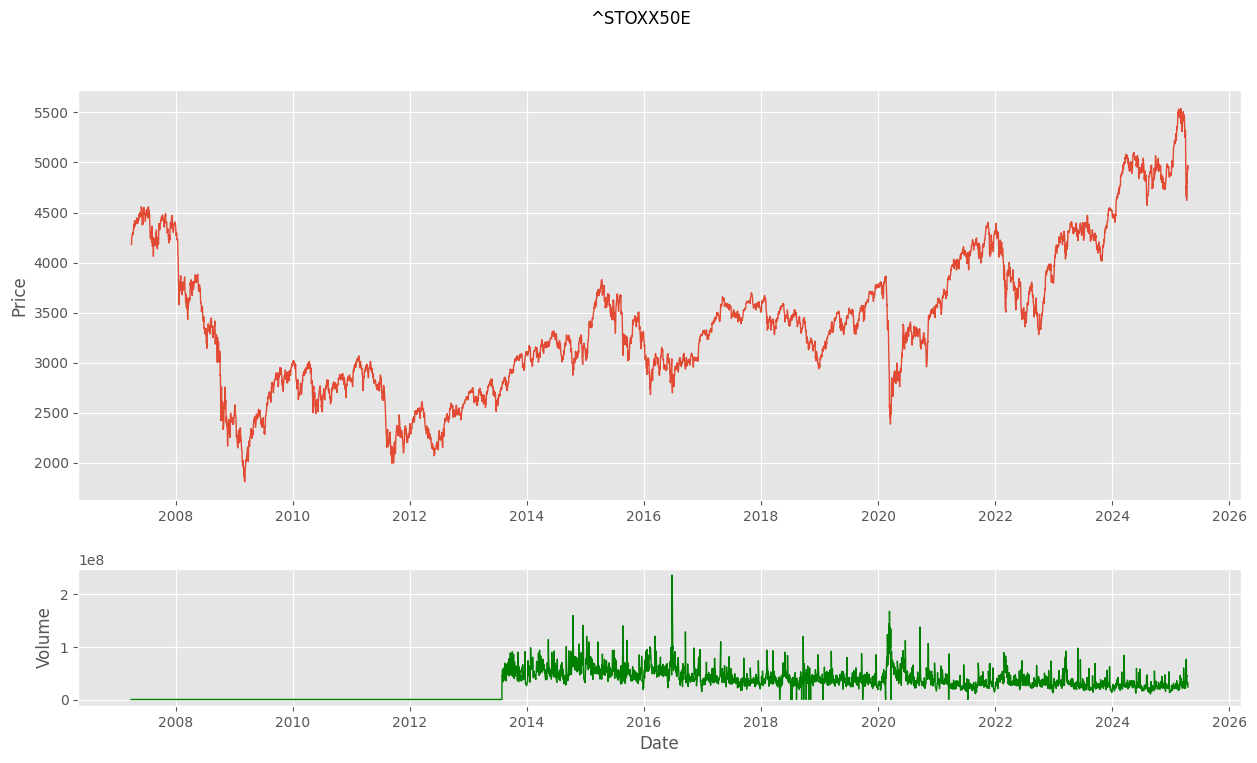

In [15]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

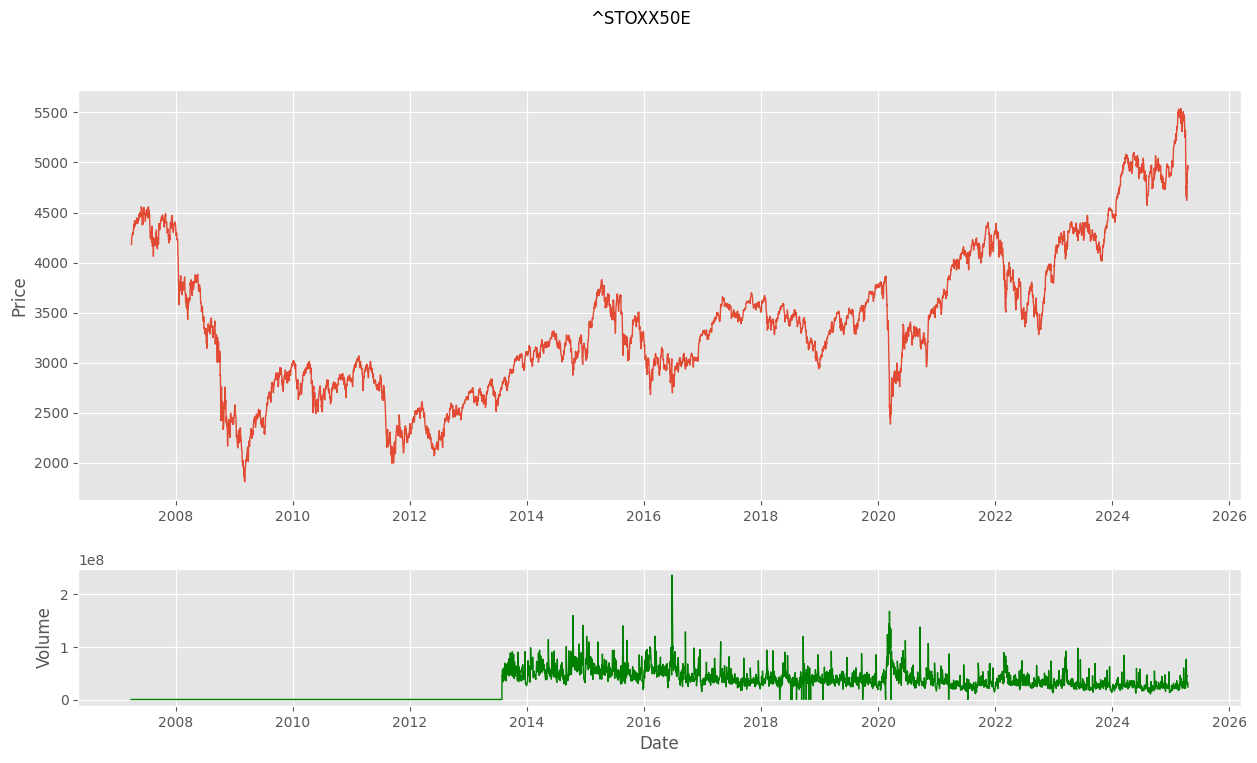

In [16]:
# Plot the close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [17]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [18]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [19]:
# Group per year and calculate cummulative return
stock_ticker['Year'] = stock_ticker.index.year
annual_data = stock_ticker.groupby('Year').agg(Adj_Close=('Adj Close','last'))
annual_data['Return'] = annual_data["Adj_Close"].pct_change()*100
annual_data

,Adj_Close,Return
Year,,
2007,4399.720215,NaN
2008,2451.479980,-44.281003
2009,2966.239990,20.997928
2010,2807.040039,-5.367062
2011,2316.550049,-17.473566
2012,2626.850098,13.394921
2013,3100.929932,18.047464
2014,3135.949951,1.129339
2015,3287.979980,4.847974


In [20]:
# Plotly
fig = make_subplots()

# Add colors
colors = ['green' if x >= 0 else 'red' for x in annual_data['Return']]

# Graph (1,1)
fig.add_trace(go.Bar(y=annual_data['Return'],x=annual_data['Return'].index,text=round(annual_data['Return'],2),textposition='outside',marker_color=colors,hoverinfo='skip'),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Returns", row=1, col=1)

fig.update_layout(xaxis=dict(tickvals=annual_data.index,tickangle=-45),height=800, width=1300,title=f"Returns per year {ticker}")

fig.show()

In [21]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

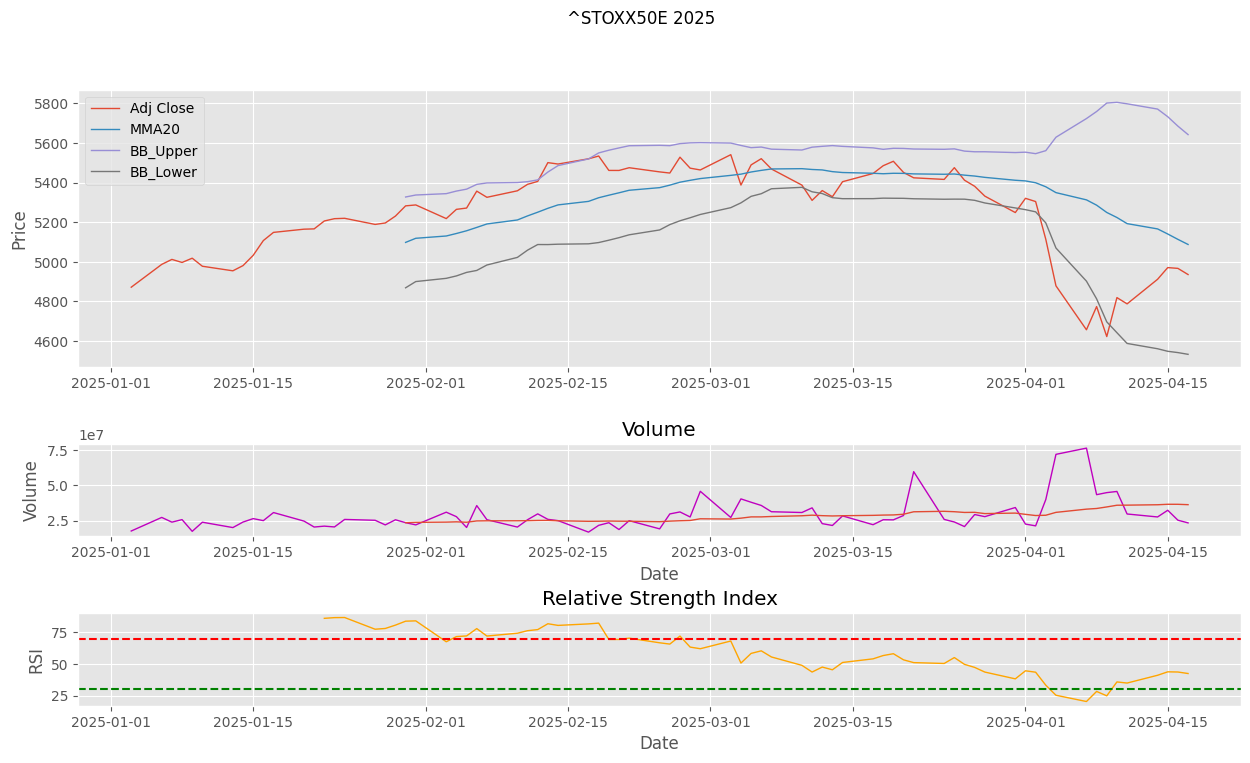

In [22]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [23]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [24]:
stock_ticker.tail(10)

,Adj Close,Close,Dividends,High,Low,Open,Stock Splits,Volume,Year,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,,,,
2025-04-04,4878.310059,4878.310059,0.0,5094.790039,4825.700195,5094.790039,0.0,71980100,2025,5349.040991,5628.737868,5069.344114,25.346998,-4.595284
2025-04-07,4656.410156,4656.410156,0.0,4902.990234,4540.220215,4861.160156,0.0,76388500,2025,5312.512500,5723.064131,4901.960869,20.406886,-4.548704
2025-04-08,4773.649902,4773.649902,0.0,4826.680176,4669.950195,4700.370117,0.0,43434700,2025,5285.700000,5758.722426,4812.677574,28.352274,2.517814
2025-04-09,4622.140137,4622.140137,0.0,4708.140137,4569.509766,4705.910156,0.0,44888000,2025,5248.836011,5801.366385,4696.305637,24.893823,-3.173877
2025-04-10,4818.919922,4818.919922,0.0,4987.620117,4631.370117,4631.370117,0.0,45707700,2025,5223.362500,5805.078936,4641.646064,35.840434,4.257331
2025-04-11,4787.229980,4787.229980,0.0,4870.970215,4728.529785,4841.640137,0.0,29758300,2025,5192.514990,5797.569570,4587.460410,34.956822,-0.657615
2025-04-14,4911.390137,4911.390137,0.0,4936.120117,4828.560059,4828.560059,0.0,27662300,2025,5165.807007,5770.983587,4560.630427,41.085362,2.593570
2025-04-15,4970.430176,4970.430176,0.0,4977.490234,4913.729980,4915.470215,0.0,32396600,2025,5140.078027,5732.401513,4547.754541,43.797192,1.202104
2025-04-16,4966.500000,4966.500000,0.0,4967.089844,4891.109863,4956.149902,0.0,25368200,2025,5113.035034,5684.846625,4541.223444,43.653144,-0.079071


  0%|          | 0/51 [00:00<?, ?it/s]

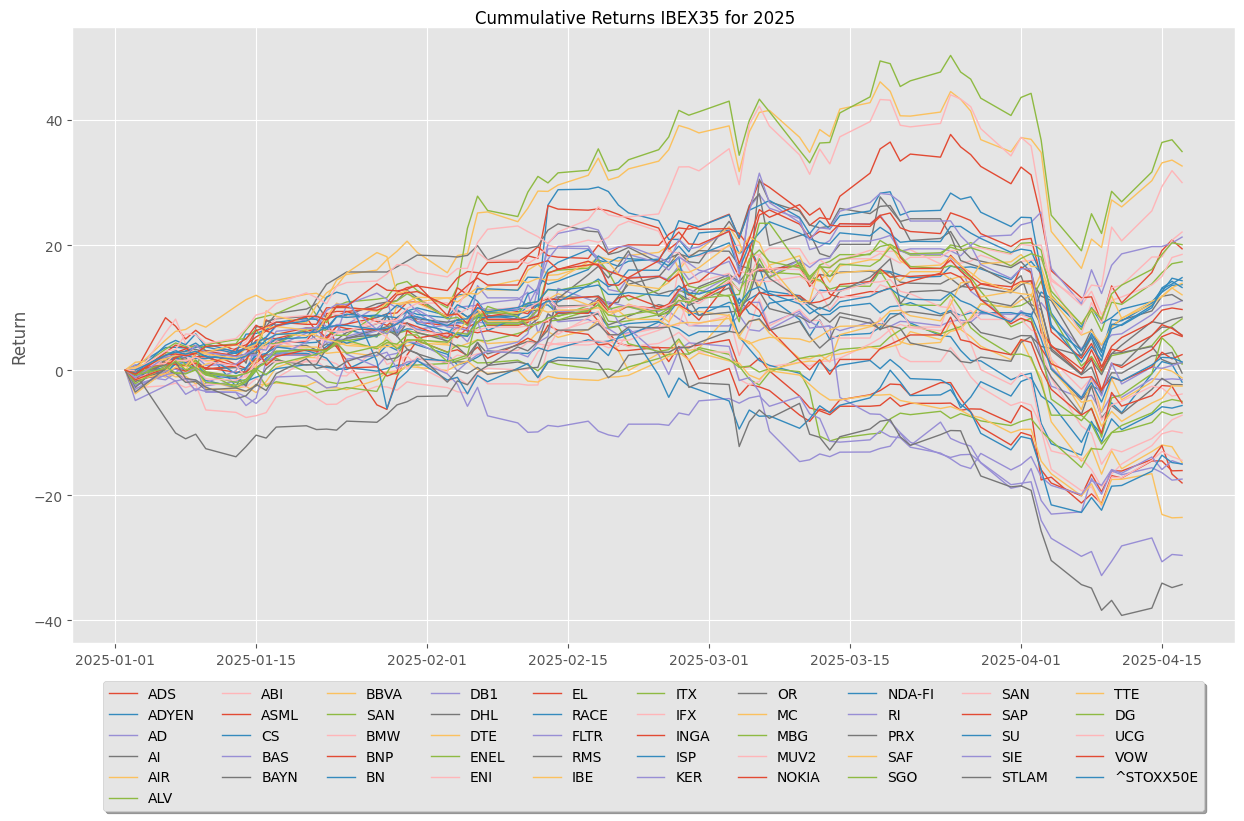

In [25]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [26]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/51 [00:00<?, ?it/s]

In [27]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(60)


  0%|          | 0/51 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,SAN.MC,Banco Santander,2025-04-17,34.953443
1,BBVA.MC,BBVA,2025-04-17,32.638790
2,UCG.MI,UniCredit,2025-04-17,29.989573
3,MUV2.DE,Munich Re,2025-04-17,22.075280
4,DB1.DE,Deutsche Börse,2025-04-17,21.268986
5,DG.PA,Vinci SA,2025-04-17,20.060181
6,BNP.PA,BNP Paribas,2025-04-17,19.392401
7,ABI.BR,Anheuser-Busch InBev,2025-04-17,18.498771
8,ALV.DE,Allianz,2025-04-17,17.318068
9,CS.PA,AXA,2025-04-17,14.787915


In [28]:
# Create also table of daily returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Daily_Return'] = daily_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Daily_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Daily_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Daily_Return'],ignore_index=True, ascending=False).head(40)

  0%|          | 0/51 [00:00<?, ?it/s]

,Ticker,Name,Date,Daily_Return
0,ENEL.MI,Enel,2025-04-17,1.083230
1,MUV2.DE,Munich Re,2025-04-17,1.078171
2,CS.PA,AXA,2025-04-17,0.893765
3,ENI.MI,Eni,2025-04-17,0.804999
4,DB1.DE,Deutsche Börse,2025-04-17,0.779802
5,STLAM.MI,Stellantis,2025-04-17,0.753436
6,VOW.DE,Volkswagen Group,2025-04-17,0.660791
7,IBE.MC,Iberdrola,2025-04-17,0.618089
8,AD.AS,Ahold Delhaize,2025-04-17,0.552965
9,SIE.DE,Siemens,2025-04-17,0.472765
